# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as request
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# just in case for troubleshooting
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric"
query_url = f"{url}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = request.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tanjung selor
City not found. Skipping...
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | karak city
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | pandan
Processing Record 8 of Set 1 | kostomuksha
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | tolanaro
Processing Record 13 of Set 1 | lerwick
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | francistown
Processing Record 17 of Set 1 | wildwood
Processing Record 18 of Set 1 | saint-pierre
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | kodiak
Processing Reco

Processing Record 35 of Set 4 | san antonio de pale
Processing Record 36 of Set 4 | az zarqa
Processing Record 37 of Set 4 | alvorada
Processing Record 38 of Set 4 | nuriootpa
Processing Record 39 of Set 4 | antsiranana
Processing Record 40 of Set 4 | kirensk
Processing Record 41 of Set 4 | mwinilunga
Processing Record 42 of Set 4 | wailua homesteads
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | ormara
Processing Record 46 of Set 4 | lu-uk
Processing Record 47 of Set 4 | mirny
Processing Record 48 of Set 4 | sisimiut
Processing Record 49 of Set 4 | nuuk
Processing Record 0 of Set 5 | tughyl
Processing Record 1 of Set 5 | kiffa
Processing Record 2 of Set 5 | tinaan
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | badger
Processing Record 5 of Set 5 | vryburg
Processing Record 6 of Set 5 | tutoia
Processing Record 7 of Set 5 | college
Processing Record 8 of Set 5 | al kharijah
Processing Record 9 of S

Processing Record 27 of Set 8 | shingu
Processing Record 28 of Set 8 | keflavik
Processing Record 29 of Set 8 | portland
Processing Record 30 of Set 8 | sinabang
Processing Record 31 of Set 8 | yazihan
Processing Record 32 of Set 8 | cheremshan
Processing Record 33 of Set 8 | murashi
Processing Record 34 of Set 8 | kegeyli shahar
Processing Record 35 of Set 8 | le vauclin
Processing Record 36 of Set 8 | huron
Processing Record 37 of Set 8 | san jose village
City not found. Skipping...
Processing Record 38 of Set 8 | laikit, laikit ii (dimembe)
Processing Record 39 of Set 8 | ust-tsilma
Processing Record 40 of Set 8 | queenstown
Processing Record 41 of Set 8 | yarkovo
Processing Record 42 of Set 8 | vadso
Processing Record 43 of Set 8 | cape canaveral
Processing Record 44 of Set 8 | cabo san lucas
Processing Record 45 of Set 8 | japekrom
City not found. Skipping...
Processing Record 46 of Set 8 | takanabe
Processing Record 47 of Set 8 | n'zeto
Processing Record 48 of Set 8 | barysh
Proc

Processing Record 15 of Set 12 | little cayman
City not found. Skipping...
Processing Record 16 of Set 12 | coahuayana de hidalgo
Processing Record 17 of Set 12 | pitimbu
Processing Record 18 of Set 12 | sudogda
Processing Record 19 of Set 12 | nova olimpia
Processing Record 20 of Set 12 | sinan
Processing Record 21 of Set 12 | al muwayh
Processing Record 22 of Set 12 | aswan
Processing Record 23 of Set 12 | santiago de cao
Processing Record 24 of Set 12 | elmali
Processing Record 25 of Set 12 | salamanca
Processing Record 26 of Set 12 | weyburn
Processing Record 27 of Set 12 | dumbraveni
Processing Record 28 of Set 12 | biltine
Processing Record 29 of Set 12 | egilsstadir
Processing Record 30 of Set 12 | turpan
Processing Record 31 of Set 12 | pionerskiy
Processing Record 32 of Set 12 | taybad
Processing Record 33 of Set 12 | grand falls-windsor
Processing Record 34 of Set 12 | roma
Processing Record 35 of Set 12 | afif
Processing Record 36 of Set 12 | ahau
City not found. Skipping...

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-2.55,92,96,6.07,GS,1690297210
1,yellowknife,62.4560,-114.3525,20.31,60,100,6.17,CA,1690297210
2,karak city,31.1637,35.7620,32.30,22,0,4.77,JO,1690297211
3,longyearbyen,78.2186,15.6401,11.91,66,40,2.57,SJ,1690297211
4,vorgashor,67.5833,63.9500,18.26,80,100,3.30,RU,1690297212


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.55,92,96,6.07,GS,1690297210
1,yellowknife,62.4560,-114.3525,20.31,60,100,6.17,CA,1690297210
2,karak city,31.1637,35.7620,32.30,22,0,4.77,JO,1690297211
3,longyearbyen,78.2186,15.6401,11.91,66,40,2.57,SJ,1690297211
4,vorgashor,67.5833,63.9500,18.26,80,100,3.30,RU,1690297212


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [16]:
# set date
date_var = datetime.fromtimestamp(city_data_df["Date"][0]).date()
# format to mm/dd/yyyy
date_var = datetime.strftime(date_var, "%m/%d/%Y")
print(date_var)

07/25/2023


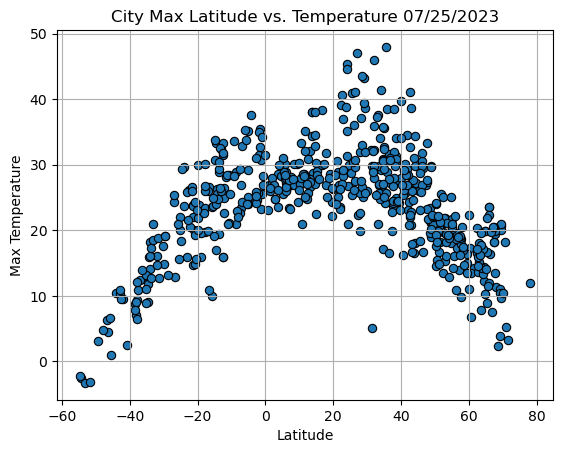

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor="black", linewidth=0.80)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date_var})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

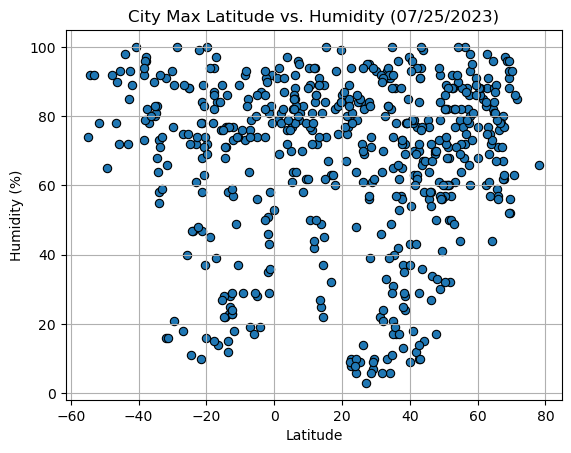

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor="black", linewidth=0.80)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date_var})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

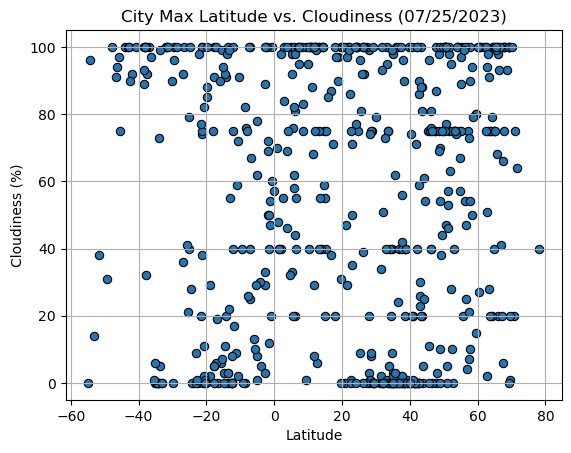

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor="black", linewidth=0.80)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({date_var})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

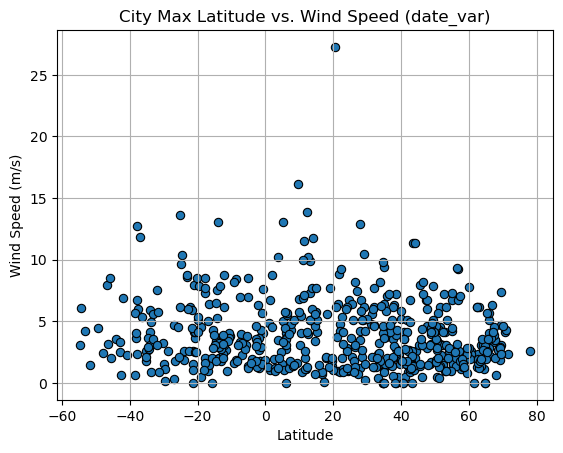

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor="black", linewidth=0.80)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed (date_var)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linearregression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x ,y)
    # regression equation
    linreg_eq = x*slope +intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    return linreg_eq, line_eq, slope, intercept, rvalue, pvalue, stderr

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,20.31,60,100,6.17,CA,1690297210
2,karak city,31.1637,35.7620,32.30,22,0,4.77,JO,1690297211
3,longyearbyen,78.2186,15.6401,11.91,66,40,2.57,SJ,1690297211
4,vorgashor,67.5833,63.9500,18.26,80,100,3.30,RU,1690297212
5,pandan,14.0453,124.1694,28.67,81,100,11.77,PH,1690297212


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.55,92,96,6.07,GS,1690297210
7,punta arenas,-53.1500,-70.9167,-3.27,92,14,4.23,CL,1690297213
8,adamstown,-25.0660,-130.1015,22.07,88,79,13.62,PN,1690297217
10,tolanaro,-25.0319,46.9987,20.04,88,40,6.17,MG,1690297225
12,waitangi,-43.9535,-176.5597,10.46,98,100,3.58,NZ,1690297233


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6066242210536449


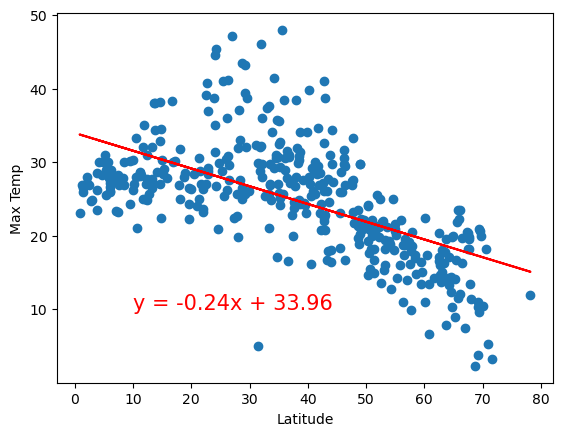

In [25]:
# Linear regression on Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
# invoke linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regression equation
linreg_eq = x_values*slope +intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
# plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, linreg_eq,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# print and output
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
# saving
plt.savefig("output_data/Fig5.png")
plt.show()

The r-value is: 0.8471709043683537


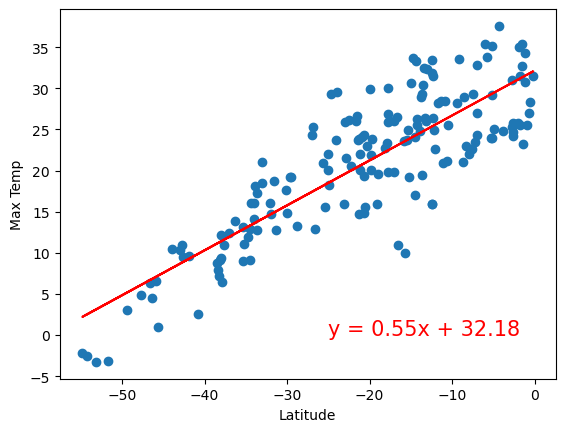

In [26]:
# Linear regression on Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
# invoke linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regression equation
linreg_eq = x_values*slope +intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
# plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, linreg_eq,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# print and output
plt.annotate(line_eq, (-25,0), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
# saving
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** For the northern hemisphere, as the latitude goes away from the equator, there is a moderate but negative correlation for latitude to max temp. However, for the southern hemisphere, as the latitude goes closer to the equator, there is a strong and positive correlation between latitude and max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.030450323049825007


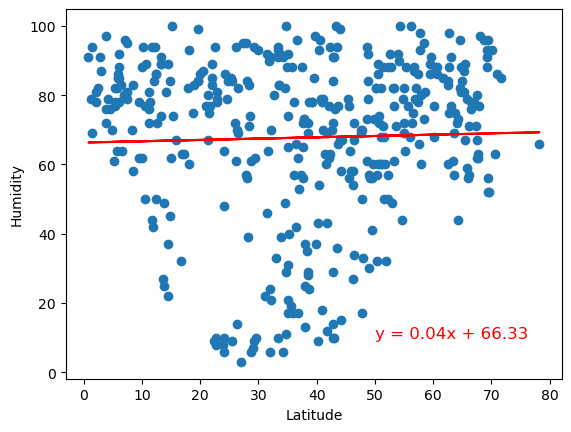

In [27]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
# invoke linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regression equation
linreg_eq = x_values*slope +intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
# plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, linreg_eq,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# print and output
plt.annotate(line_eq,(50,10),fontsize=12,color="red")
print(f"The r-value is: {rvalue}")
# saving
plt.savefig("output_data/Fig7.png")
plt.show()

The r-value is: -0.2949395725827345


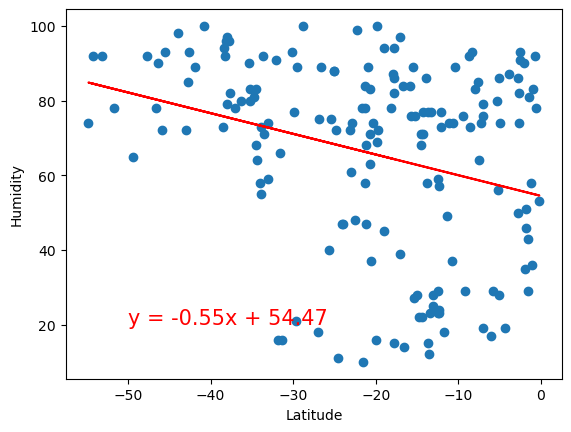

In [28]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
# invoke linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regression equation
linreg_eq = x_values*slope +intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
# plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, linreg_eq,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# print and output
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
# saving
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has almost no correlation for latitude and Humidity, while the Southern Hemisphere has a weak and negative correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.010390020821248534


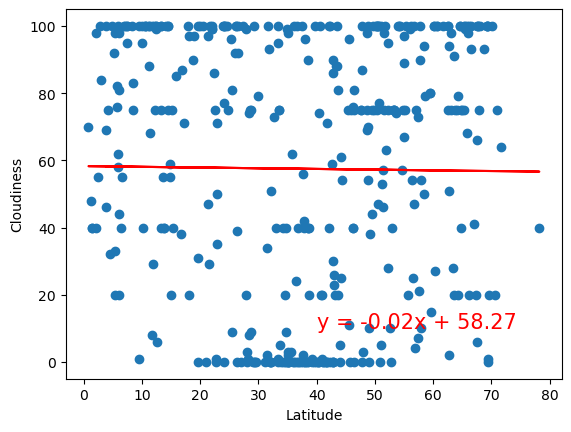

In [29]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
# invoke linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regression equation
linreg_eq = x_values*slope +intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
# plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, linreg_eq,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# print and output
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
# saving
plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: -0.17098898206432225


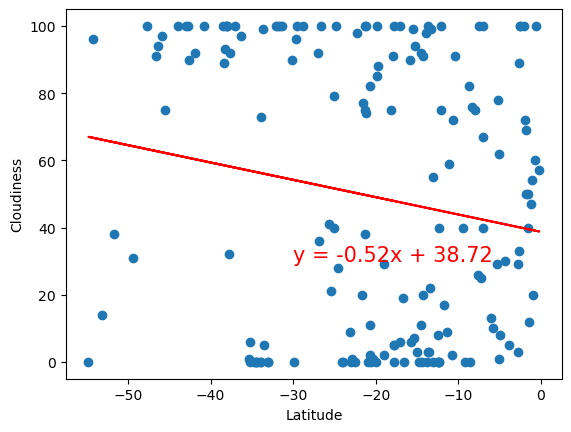

In [30]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
# invoke linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regression equation
linreg_eq = x_values*slope +intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
# plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, linreg_eq,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# print and output
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
# saving
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** Similar to latitude vs humidity, there is almost no correlation with the northern hemisphere but a weak and negative correlation for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1697056976550458


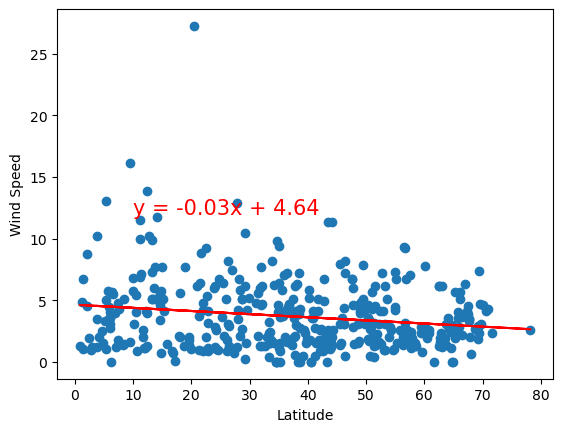

In [31]:
# Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
# invoke linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regression equation
linreg_eq = x_values*slope +intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
# plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, linreg_eq,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# print and output
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
# saving
plt.savefig("output_data/Fig11.png")
plt.show()

The r-value is: -0.08473521495531304


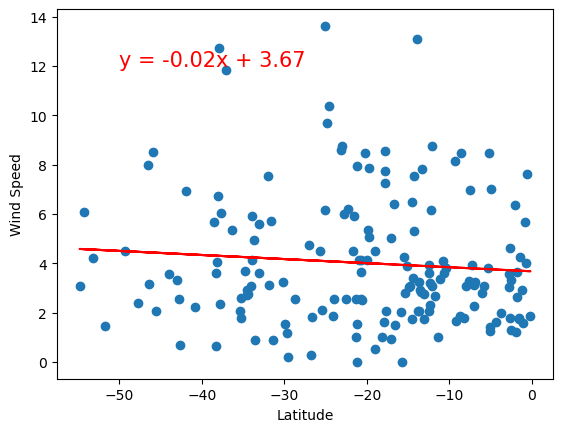

In [32]:
# Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
# invoke linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regression equation
linreg_eq = x_values*slope +intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
# plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, linreg_eq,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# print and output
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
# saving
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** For latitude vs. wind speed, both the north and southern hemisphere have weak and negative correlations.